# Exploring Motor Vehicle Collisions by Boroughs

## Loading in our data

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import dateutil.parser

In [12]:
collisions = pd.read_csv('NYPD_Motor_Vehicle_Collisions.csv')

## Peek at what the dataframe looks like

In [13]:
collisions.shape

(891085, 29)

In [14]:
collisions.columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 5', 'UNIQUE KEY', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5'],
      dtype='object')

## Adding some columns I'll want

In [22]:
astoria_zips = [11101, 11102, 11103, 11104, 11105, 11106]

def is_astoria(x):
    if x in astoria_zips:
        return 1
    else: 
        return 0
    
collisions['IS_ASTORIA'] = collisions['ZIP CODE'].apply(is_astoria)


def what_year(x):
    return (str(x))[-4:]

collisions['YEAR'] = collisions['DATE'].apply(what_year)

# Distribution of collisions by borough

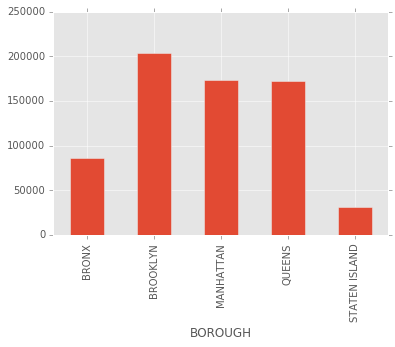

In [24]:
collisions.groupby('BOROUGH')['UNIQUE KEY'].count().plot(kind="bar")

In [23]:
collisions['BOROUGH'].value_counts()

BROOKLYN         203977
MANHATTAN        173381
QUEENS           172090
BRONX             86128
STATEN ISLAND     31001
Name: BOROUGH, dtype: int64

### Which borough has the most collisions per capita? 

Source: https://www1.nyc.gov/site/planning/data-maps/nyc-population/current-future-populations.page

The numbers below rely on the 2010 Census. 

In [41]:
print("Brooklyn: ", 203977 / 2504700)
print("Manhattan: ", 173381 / 1585873)
print("Queens: ", 172090 / 2230722)
print("Bronx: ", 86128 / 1385108)
print("Staten Island: ", 31001 / 468730)

Brooklyn:  0.08143769712939673
Manhattan:  0.10932842667729382
Queens:  0.0771454264583395
Bronx:  0.06218143278358077
Staten Island:  0.06613828856697886


**FINDING:** Even though Brooklyn has a higher raw number of collisions, Manhattan has more collisions per capita. This finding is not entirely unexpected -- people from other boroughs may be commuting to Manhattan for work. To understand which borough is truly more dangerous, it may be necessary to look at mileage rather than population - such a metric would be more relevant to identifying dangerous streets. 

## Collisions by year

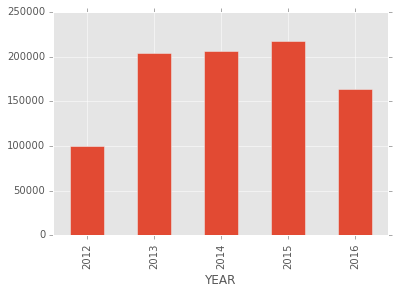

In [25]:
collisions.groupby('YEAR')['UNIQUE KEY'].count().plot(kind="bar")

Looks like the data is incomplete for 2012 and 2016 (which makes sense for at least 2016, given that the year isn't over). 

## Let's look the boroughs over time

In [26]:
collisions_bytime = collisions.copy()

In [34]:
def parse_date(str_date):
    return dateutil.parser.parse(str_date)

In [31]:
collisions_bytime['dt_str'] = collisions_bytime['DATE'] + " " + collisions_bytime['TIME']

In [32]:
collisions_bytime.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,IS_ASTORIA,YEAR,dt_str
0,07/27/2016,7:15,MANHATTAN,10065.0,40.763366,-73.959241,"(40.7633655, -73.9592408)",1 AVENUE,EAST 65 STREET,NaN,...,NaN,3489259,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,0,2016,07/27/2016 7:15
1,07/27/2016,7:30,BROOKLYN,11233.0,40.679748,-73.928650,"(40.679748, -73.92865)",REID AVENUE,MARION STREET,NaN,...,NaN,3502510,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,0,2016,07/27/2016 7:30
2,07/27/2016,7:35,BROOKLYN,11208.0,40.671341,-73.881939,"(40.6713407, -73.8819394)",SUTTER AVENUE,LINWOOD STREET,NaN,...,NaN,3488903,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,0,2016,07/27/2016 7:35
3,04/10/2016,4:10,NaN,NaN,NaN,NaN,NaN,LAUREL HILL BOULEVARD,47 STREET,NaN,...,NaN,3425816,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,0,2016,04/10/2016 4:10
4,04/10/2016,4:15,QUEENS,11373.0,40.748472,-73.870016,"(40.7484722, -73.8700155)",WARREN STREET,40 ROAD,NaN,...,NaN,3427103,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,0,2016,04/10/2016 4:15


In [35]:
collisions_bytime['datetime'] = collisions_bytime['dt_str'].apply(parse_date)

In [38]:
collisions_bytime.index = collisions_bytime['datetime']

In [39]:
# checking that our code ran correctly
collisions_bytime.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,IS_ASTORIA,YEAR,dt_str,datetime
datetime,,,,,,,,,,,,,,,,,,,,,
2016-07-27 07:15:00,07/27/2016,7:15,MANHATTAN,10065.0,40.763366,-73.959241,"(40.7633655, -73.9592408)",1 AVENUE,EAST 65 STREET,NaN,...,3489259,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,0,2016,07/27/2016 7:15,2016-07-27 07:15:00
2016-07-27 07:30:00,07/27/2016,7:30,BROOKLYN,11233.0,40.679748,-73.928650,"(40.679748, -73.92865)",REID AVENUE,MARION STREET,NaN,...,3502510,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,0,2016,07/27/2016 7:30,2016-07-27 07:30:00
2016-07-27 07:35:00,07/27/2016,7:35,BROOKLYN,11208.0,40.671341,-73.881939,"(40.6713407, -73.8819394)",SUTTER AVENUE,LINWOOD STREET,NaN,...,3488903,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,0,2016,07/27/2016 7:35,2016-07-27 07:35:00
2016-04-10 04:10:00,04/10/2016,4:10,NaN,NaN,NaN,NaN,NaN,LAUREL HILL BOULEVARD,47 STREET,NaN,...,3425816,PASSENGER VEHICLE,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,0,2016,04/10/2016 4:10,2016-04-10 04:10:00
2016-04-10 04:15:00,04/10/2016,4:15,QUEENS,11373.0,40.748472,-73.870016,"(40.7484722, -73.8700155)",WARREN STREET,40 ROAD,NaN,...,3427103,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,0,2016,04/10/2016 4:15,2016-04-10 04:15:00


In [62]:
brooklyn_df = collisions_bytime[collisions_bytime['BOROUGH'] == 'BROOKLYN']
queens_df = collisions_bytime[collisions_bytime['BOROUGH'] == 'QUEENS']
manhattan_df = collisions_bytime[collisions_bytime['BOROUGH'] == 'MANHATTAN']
bronx_df = collisions_bytime[collisions_bytime['BOROUGH'] == 'BRONX']
si_df = collisions_bytime[collisions_bytime['BOROUGH'] == 'STATEN ISLAND']

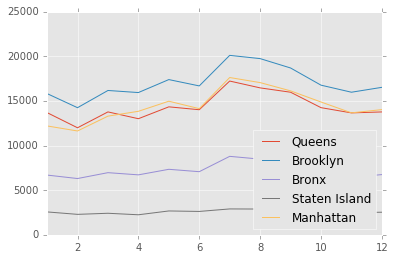

In [63]:
ax = queens_df.groupby(by=queens_df.index.month).count().plot(y='UNIQUE KEY', label='Queens')
brooklyn_df.groupby(by=brooklyn_df.index.month).count().plot(y='UNIQUE KEY', label='Brooklyn', ax=ax)
bronx_df.groupby(by=bronx_df.index.month).count().plot(y='UNIQUE KEY', label='Bronx', ax=ax)
si_df.groupby(by=si_df.index.month).count().plot(y='UNIQUE KEY', label='Staten Island', ax=ax)
manhattan_df.groupby(by=manhattan_df.index.month).count().plot(y='UNIQUE KEY', label='Manhattan', ax=ax)

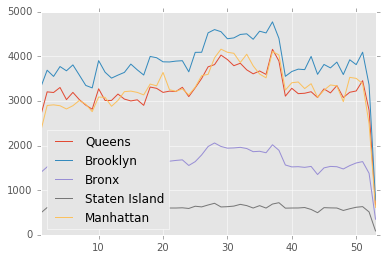

In [65]:
ax = queens_df.groupby(by=queens_df.index.week).count().plot(y='UNIQUE KEY', label='Queens')
brooklyn_df.groupby(by=brooklyn_df.index.week).count().plot(y='UNIQUE KEY', label='Brooklyn', ax=ax)
bronx_df.groupby(by=bronx_df.index.week).count().plot(y='UNIQUE KEY', label='Bronx', ax=ax)
si_df.groupby(by=si_df.index.week).count().plot(y='UNIQUE KEY', label='Staten Island', ax=ax)
manhattan_df.groupby(by=manhattan_df.index.week).count().plot(y='UNIQUE KEY', label='Manhattan', ax=ax)

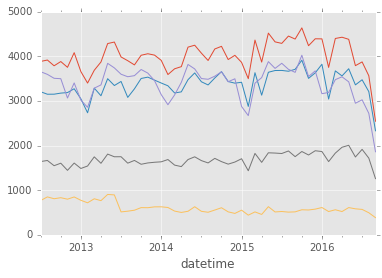

In [69]:
brooklyn_df['UNIQUE KEY'].resample('M').count().plot(label='Brooklyn')
queens_df['UNIQUE KEY'].resample('M').count().plot(label='Queens')
manhattan_df['UNIQUE KEY'].resample('M').count().plot(label='Manhattan')
bronx_df['UNIQUE KEY'].resample('M').count().plot(label='Bronx')
si_df['UNIQUE KEY'].resample('M').count().plot(label='Staten Island')

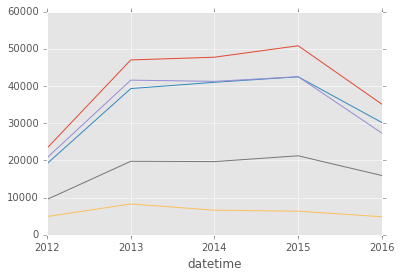

In [70]:
brooklyn_df['UNIQUE KEY'].resample('A').count().plot(label='Brooklyn')
queens_df['UNIQUE KEY'].resample('A').count().plot(label='Queens')
manhattan_df['UNIQUE KEY'].resample('A').count().plot(label='Manhattan')
bronx_df['UNIQUE KEY'].resample('A').count().plot(label='Bronx')
si_df['UNIQUE KEY'].resample('A').count().plot(label='Staten Island')

**There isn't really anything interesting happening when we analyse the data over time. A few notes:**

+ Most boroughs saw a slight increase from 2014 to 2015
+ The summer months seem to be most dangerous -- but note that we have missing data in 2012 and in 2016. This could be skewing our results.

## Let's just look at 2015 to look for cyclical trends

In [57]:
collisions2015 = collisions_bytime["2015"]

In [71]:
brooklyn_df2015 = collisions2015[collisions2015['BOROUGH'] == 'BROOKLYN']
queens_df2015 = collisions2015[collisions2015['BOROUGH'] == 'QUEENS']
manhattan_df2015 = collisions2015[collisions2015['BOROUGH'] == 'MANHATTAN']
bronx_df2015 = collisions2015[collisions2015['BOROUGH'] == 'BRONX']
si_df2015 = collisions2015[collisions2015['BOROUGH'] == 'STATEN ISLAND']

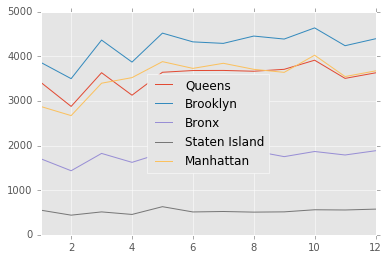

In [73]:
ax = queens_df2015.groupby(by=queens_df2015.index.month).count().plot(y='UNIQUE KEY', label='Queens')
brooklyn_df2015.groupby(by=brooklyn_df2015.index.month).count().plot(y='UNIQUE KEY', label='Brooklyn', ax=ax)
bronx_df2015.groupby(by=bronx_df2015.index.month).count().plot(y='UNIQUE KEY', label='Bronx', ax=ax)
si_df2015.groupby(by=si_df2015.index.month).count().plot(y='UNIQUE KEY', label='Staten Island', ax=ax)
manhattan_df2015.groupby(by=manhattan_df2015.index.month).count().plot(y='UNIQUE KEY', label='Manhattan', ax=ax)

## Not all collisions are created equal... Let's only look at collisions with injuries or fatalies

In [74]:
serious_collisions = collisions[(collisions['NUMBER OF PERSONS KILLED'] > 0) | (collisions['NUMBER OF PERSONS INJURED'] > 0)]

In [77]:
serious_collisions['NUMBER OF PERSONS INJURED'].head(50)

3      1
5      1
7      1
17     1
23     1
37     1
46     1
57     1
58     1
59     1
68     2
78     1
80     1
81     1
86     1
87     1
91     1
101    2
103    1
110    1
116    1
124    1
125    1
129    1
130    3
131    1
133    3
138    1
151    1
152    1
163    1
178    1
188    1
192    1
196    1
212    1
214    1
215    2
231    1
232    2
240    1
241    1
252    1
253    1
259    1
271    4
273    1
277    1
282    1
295    1
Name: NUMBER OF PERSONS INJURED, dtype: int64

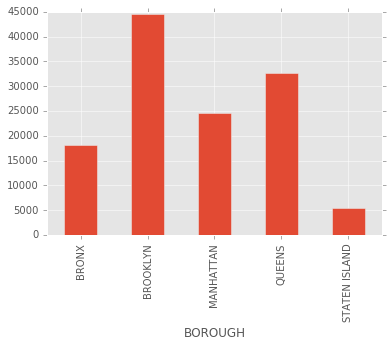

In [78]:
serious_collisions.groupby('BOROUGH')['UNIQUE KEY'].count().plot(kind="bar")

In [80]:
serious_collisions.groupby('BOROUGH')['UNIQUE KEY'].count()

BOROUGH
BRONX            18099
BROOKLYN         44623
MANHATTAN        24620
QUEENS           32707
STATEN ISLAND     5426
Name: UNIQUE KEY, dtype: int64

In [82]:
print("Brooklyn: ", (44623 / 2504700) * 1000 )
print("Manhattan: ", (24620 / 1585873) * 1000 )
print("Queens: ", (32707 / 2230722) * 1000 )
print("Bronx: ", (18099 / 1385108) * 1000 )
print("Staten Island: ", (5426 / 468730) * 1000 )

Brooklyn:  17.815706471832954
Manhattan:  15.524572270288983
Queens:  14.662069052082689
Bronx:  13.066851104751398
Staten Island:  11.575960574317838


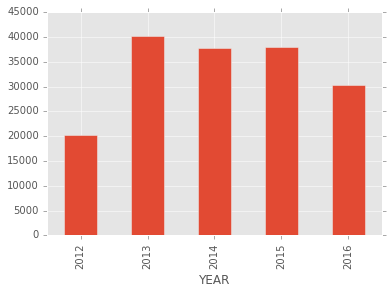

In [83]:
serious_collisions.groupby('YEAR')['UNIQUE KEY'].count().plot(kind="bar")

## Serious collisions by borough over time

In [84]:
serious_collisions_bytime = serious_collisions.copy()

In [85]:
serious_collisions_bytime['dt_str'] = serious_collisions_bytime['DATE'] + " " + serious_collisions_bytime['TIME']
serious_collisions_bytime['datetime'] = serious_collisions_bytime['dt_str'].apply(parse_date)
serious_collisions_bytime.index = serious_collisions_bytime['datetime']

In [86]:
serious_brooklyn_df = serious_collisions_bytime[serious_collisions_bytime['BOROUGH'] == 'BROOKLYN']
serious_queens_df = serious_collisions_bytime[serious_collisions_bytime['BOROUGH'] == 'QUEENS']
serious_manhattan_df = serious_collisions_bytime[serious_collisions_bytime['BOROUGH'] == 'MANHATTAN']
serious_bronx_df = serious_collisions_bytime[serious_collisions_bytime['BOROUGH'] == 'BRONX']
serious_si_df = serious_collisions_bytime[serious_collisions_bytime['BOROUGH'] == 'STATEN ISLAND']

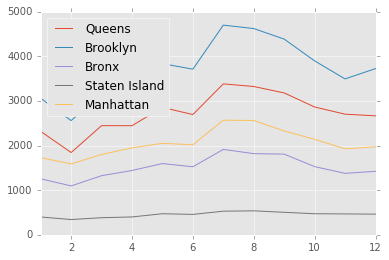

In [87]:
ax = serious_queens_df.groupby(by=serious_queens_df.index.month).count().plot(y='UNIQUE KEY', label='Queens')
serious_brooklyn_df.groupby(by=serious_brooklyn_df.index.month).count().plot(y='UNIQUE KEY', label='Brooklyn', ax=ax)
serious_bronx_df.groupby(by=serious_bronx_df.index.month).count().plot(y='UNIQUE KEY', label='Bronx', ax=ax)
serious_si_df.groupby(by=serious_si_df.index.month).count().plot(y='UNIQUE KEY', label='Staten Island', ax=ax)
serious_manhattan_df.groupby(by=serious_manhattan_df.index.month).count().plot(y='UNIQUE KEY', label='Manhattan', ax=ax)

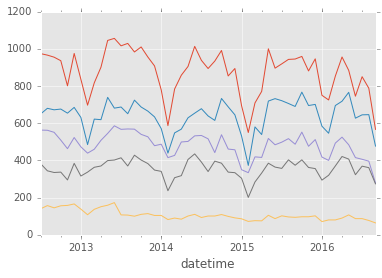

In [88]:
serious_brooklyn_df['UNIQUE KEY'].resample('M').count().plot(label='Brooklyn')
serious_queens_df['UNIQUE KEY'].resample('M').count().plot(label='Queens')
serious_manhattan_df['UNIQUE KEY'].resample('M').count().plot(label='Manhattan')
serious_bronx_df['UNIQUE KEY'].resample('M').count().plot(label='Bronx')
serious_si_df['UNIQUE KEY'].resample('M').count().plot(label='Staten Island')

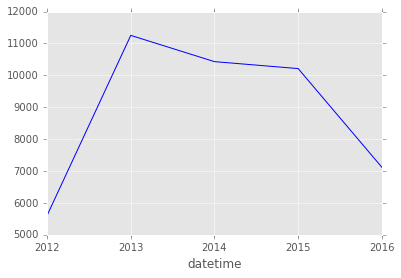

In [91]:
ax1 = serious_brooklyn_df['UNIQUE KEY'].resample('A').count().plot(color="blue")

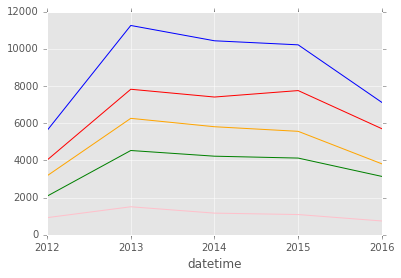

In [93]:
serious_brooklyn_df['UNIQUE KEY'].resample('A').count().plot(color="blue")
serious_queens_df['UNIQUE KEY'].resample('A').count().plot(color='red')
serious_manhattan_df['UNIQUE KEY'].resample('A').count().plot(color='orange')
serious_bronx_df['UNIQUE KEY'].resample('A').count().plot(color='green')
serious_si_df['UNIQUE KEY'].resample('A').count().plot(color='pink')

**FINDING:** Hey! Most boroguhs saw a slight dip in serious collisions from 2014 and 2015 -- Queens saw an uptick! 

In [103]:
serious_queens_df['YEAR'].value_counts().sort_values(ascending=False)

2013    7825
2015    7754
2014    7407
2016    5704
2012    4017
Name: YEAR, dtype: int64

In [98]:
print("Queens had", 7754 - 7407, "more serious collisions in 2015 than in 2014.")

Queens had 347 more serious collisions in 2015 than in 2014.


In [105]:
serious_brooklyn_df['YEAR'].value_counts().sort_values(ascending=False)

2013    11254
2014    10431
2015    10213
2016     7118
2012     5607
Name: YEAR, dtype: int64

In [106]:
serious_manhattan_df['YEAR'].value_counts().sort_values(ascending=False)

2013    6261
2014    5810
2015    5563
2016    3815
2012    3171
Name: YEAR, dtype: int64

In [104]:
serious_bronx_df['YEAR'].value_counts().sort_values(ascending=False)

2013    4532
2014    4226
2015    4125
2016    3139
2012    2077
Name: YEAR, dtype: int64

In [107]:
serious_si_df['YEAR'].value_counts().sort_values(ascending=False)

2013    1507
2014    1165
2015    1089
2012     922
2016     743
Name: YEAR, dtype: int64

# Yep, it's the only borough to see an **INCREASE** in serious collisions from 2014 to 2015. **I think I'll focus on looking at serious collisions in Queens in my next analysis. **

In [109]:
serious_bikecollisions = collisions[(collisions['NUMBER OF CYCLIST KILLED'] > 0) | (collisions['NUMBER OF CYCLIST INJURED'] > 0)]

In [110]:
seriousbike_bytime = serious_bikecollisions.copy()

In [111]:
seriousbike_bytime['dt_str'] = seriousbike_bytime['DATE'] + " " + seriousbike_bytime['TIME']
seriousbike_bytime['datetime'] = seriousbike_bytime['dt_str'].apply(parse_date)
seriousbike_bytime.index = seriousbike_bytime['datetime']

In [113]:
seriousbike_brooklyn_df = seriousbike_bytime[seriousbike_bytime['BOROUGH'] == 'BROOKLYN']
seriousbike_queens_df = seriousbike_bytime[seriousbike_bytime['BOROUGH'] == 'QUEENS']
seriousbike_manhattan_df = seriousbike_bytime[seriousbike_bytime['BOROUGH'] == 'MANHATTAN']
seriousbike_bronx_df = seriousbike_bytime[seriousbike_bytime['BOROUGH'] == 'BRONX']
seriousbike_si_df = seriousbike_bytime[seriousbike_bytime['BOROUGH'] == 'STATEN ISLAND']

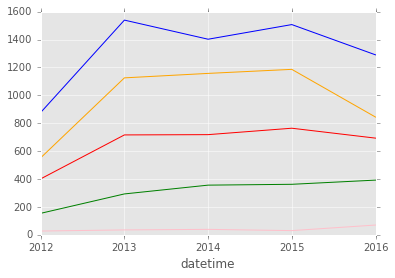

In [114]:
seriousbike_brooklyn_df['UNIQUE KEY'].resample('A').count().plot(color="blue")
seriousbike_queens_df['UNIQUE KEY'].resample('A').count().plot(color='red')
seriousbike_manhattan_df['UNIQUE KEY'].resample('A').count().plot(color='orange')
seriousbike_bronx_df['UNIQUE KEY'].resample('A').count().plot(color='green')
seriousbike_si_df['UNIQUE KEY'].resample('A').count().plot(color='pink')